In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

#CAPM

El model CAPM sigue la siguiente formula:
\begin{equation}
R_{i} = \alpha+\beta_{i}(E[r_{m}]-r_{f})
\end{equation}

In [20]:
AAPL = yf.Ticker('AAPL')
MARKET = yf.Ticker('^GSPC')

df_apple = AAPL.history(period='5y',interval='1mo')
df_mercado = MARKET.history(period='5y',interval='1mo')

In [21]:
df_apple.dropna(axis=0,inplace=True)
df_mercado.dropna(axis=0,inplace=True)

In [22]:
df = pd.DataFrame()

In [23]:
df['AAPL'] = df_apple['Close']
df['Mercado'] = df_mercado['Close']

In [24]:
df['AAPL returns'] = df['AAPL'].pct_change()
df['Mercado returns'] = df['Mercado'].pct_change()

In [25]:
df

,AAPL,Mercado,AAPL returns,Mercado returns
Date,,,,
2017-11-01,40.774220,2647.580078,NaN,NaN
2017-12-01,40.296932,2673.610107,-0.011706,0.009832
2018-01-01,39.868317,2823.810059,-0.010636,0.056179
2018-02-01,42.413807,2713.830078,0.063847,-0.038947
2018-03-01,40.114540,2640.870117,-0.054210,-0.026884
...,...,...,...,...
2022-07-01,162.284576,4130.290039,0.188634,0.091116
2022-08-01,157.001923,3955.000000,-0.032552,-0.042440
2022-09-01,138.199997,3585.620117,-0.119756,-0.093396


In [26]:
df = df.dropna(axis=0)

In [27]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant


X = df['Mercado returns']
Y = df['AAPL returns']

X_sm = add_constant(X)

In [28]:
model = OLS(Y,X_sm)

In [29]:
result = model.fit()

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AAPL returns   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     62.75
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           8.29e-11
Time:                        19:55:47   Log-Likelihood:                 81.280
No. Observations:                  60   AIC:                            -158.6
Df Residuals:                      58   BIC:                            -154.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0166      0.008      2.009      0.049    5.76e-05       0.033
Mercado returns     1.2482      0.158      7.922      0.000       0.933       1.564
==============================================================================
Omnibus:                        6.619   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.374
Skew:                          -0.429   Prob(JB):                       0.0250
Kurtosis:                       4.488   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Mercado returns', ylabel='AAPL returns'>

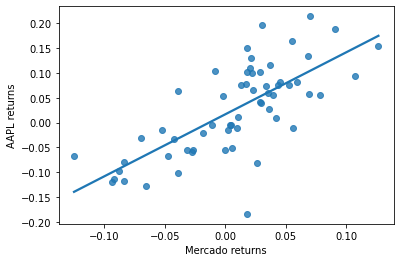

In [31]:
import seaborn as sns
sns.regplot(data=df,x='Mercado returns',y='AAPL returns',ci=None)